<a href="https://colab.research.google.com/github/Saransh-git/PredictingChurn/blob/master/child-electrical/multiclass_image_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from google.colab import drive 
from pprint import pprint
# load the libraries required 
import pandas as pd 
import numpy as np
from fastai import *
import os
import glob


In [0]:
# mount the drive 
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Defining the root directory to use the urls text
root_dir = 'gdrive/Shared drives/Fellowship.ai Chicago/'

#Defining the base directory to save the folder 
base_dir= root_dir + 'multi-class-images'

In [89]:
path=Path(base_dir)
np.random.seed(42)

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0, ds_tfms=get_transforms(), size=400, num_workers=4).normalize(imagenet_stats)
print(f"Following are the categories we are considering:")
pprint(data.classes)

Following are the categories we are considering:
['childproofed',
 'metal pins in sockets',
 'open fuse box',
 'open plugs',
 'open wires']


**Class: ChildProofed (None)**

In [0]:
datachildproof = ImageDataBunch.from_folder(path/'childproofed', train=".", valid_pct=0, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

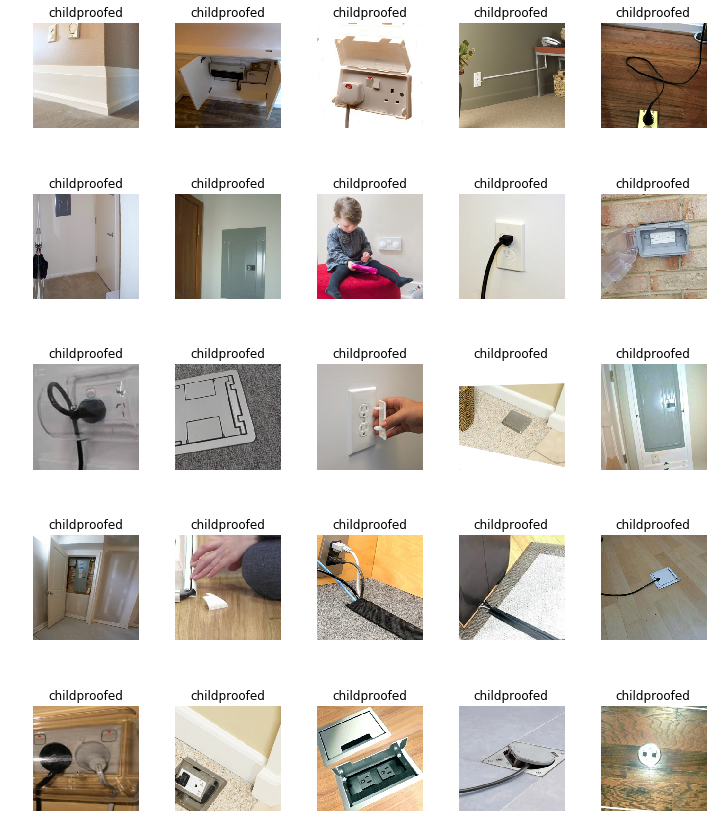

In [0]:
datachildproof.show_batch(rows=5,figsize=(10,12))

**Class: Open Plugs**

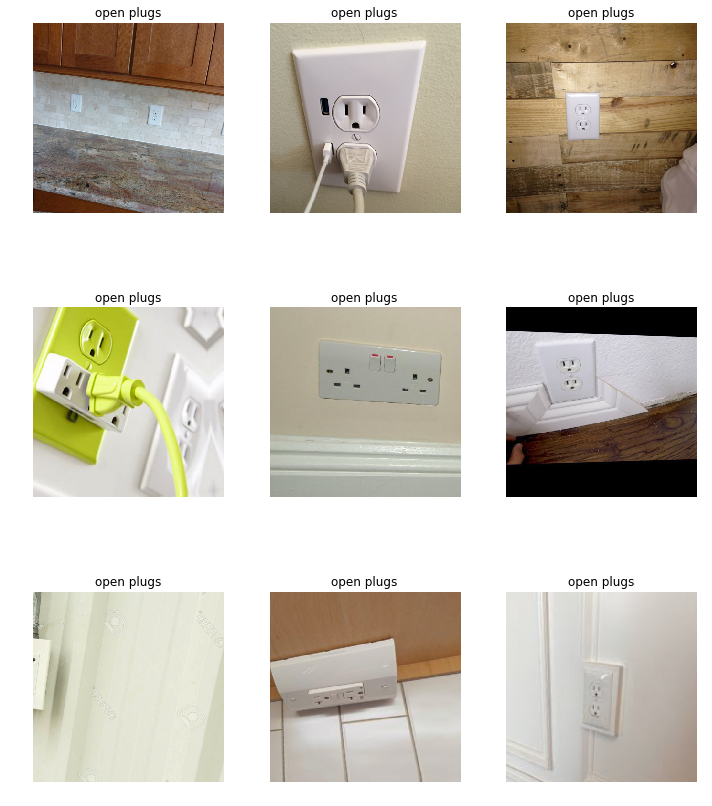

In [0]:
dataopenplugs = ImageDataBunch.from_folder(path/'open plugs', train=".", bs=32, valid_pct=0, ds_tfms=get_transforms(), size=400, num_workers=0).normalize(imagenet_stats)
dataopenplugs.show_batch(rows=3,figsize=(10,12))

**Class: Open Wires**

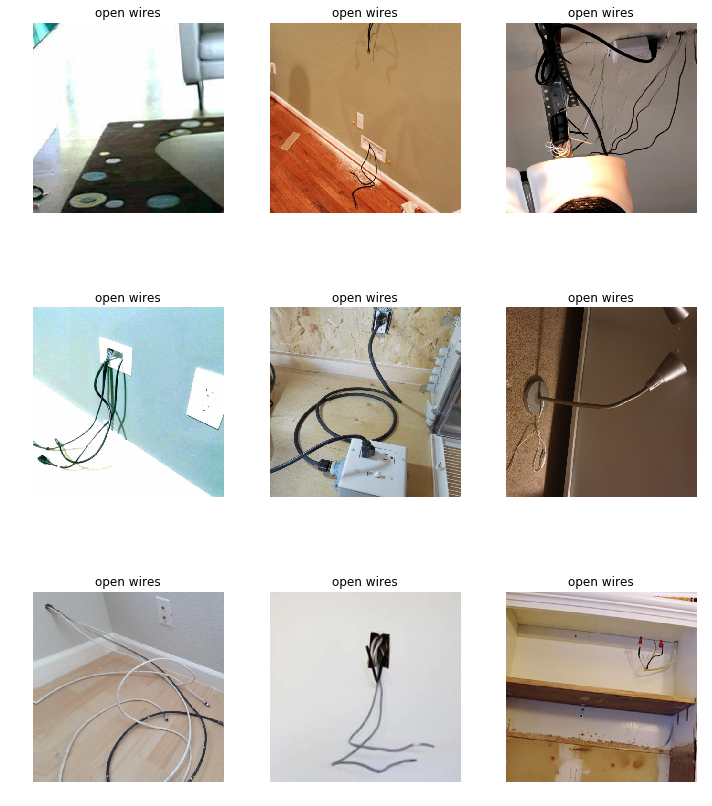

In [0]:
dataopenwires = ImageDataBunch.from_folder(path/'open wires', train=".", bs=19, valid_pct=0, ds_tfms=get_transforms(), size=400,num_workers=0).normalize(imagenet_stats)
dataopenwires.show_batch(rows=3,figsize=(10,12))

**Class: Metal Pins in Sockets**

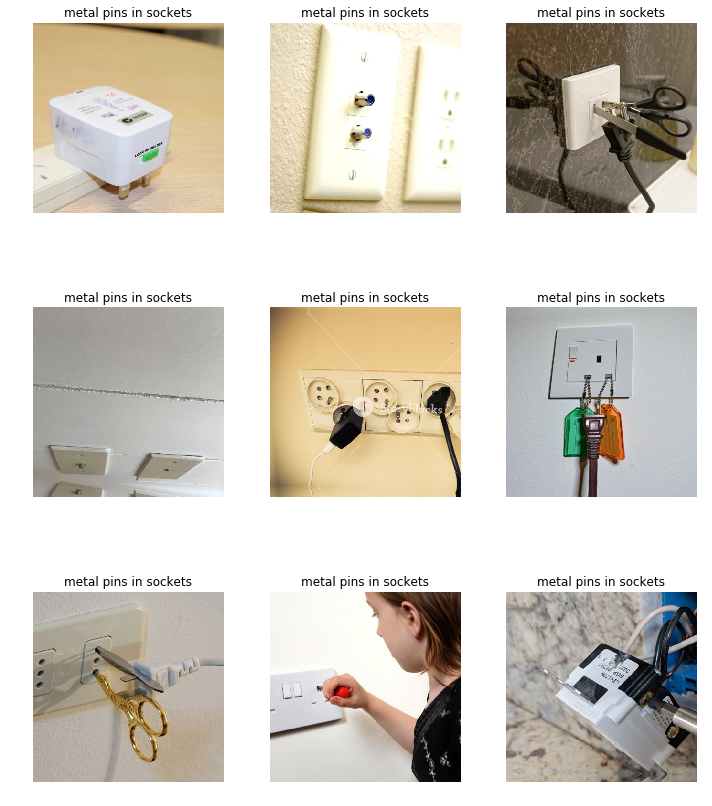

In [0]:
datametalpins = ImageDataBunch.from_folder(path/'metal pins in sockets', train=".", bs=12, valid_pct=0, ds_tfms=get_transforms(), size=400,num_workers=0).normalize(imagenet_stats)
datametalpins.show_batch(rows=3,figsize=(10,12))

In [0]:
datafusebox = ImageDataBunch.from_folder(path/'metal pins in sockets', train=".", bs=12, valid_pct=0, ds_tfms=get_transforms(), size=400,num_workers=0).normalize(imagenet_stats)
datametalpins.show_batch(rows=3,figsize=(10,12))

**Now comparing all the classes by showing them in single picture**

In [0]:
print(f"Following are the categories we are considering:")
data.classes

Following are the categories we are considering:


['childproofed',
 'metal pins in sockets',
 'open fuse box',
 'open plugs',
 'open wires']

In [0]:
def show_batch(self, rows:int=5, ds_type:DatasetType=DatasetType.Train, reverse:bool=False, **kwargs)->None:
    "Show a batch of data in `ds_type` on a few `rows`."
    x,y = self.one_batch(ds_type, True, True)
    if reverse: x,y = x.flip(0),y.flip(0)
    n_items = rows **2 if self.train_ds.x._square_show else rows
    if self.dl(ds_type).batch_size < n_items: n_items = self.dl(ds_type).batch_size
    xs = [self.train_ds.x.reconstruct(grab_idx(x, i)) for i in range(n_items)]
    #TODO: get rid of has_arg if possible
    if has_arg(self.train_ds.y.reconstruct, 'x'):
        ys = [self.train_ds.y.reconstruct(grab_idx(y, i), x=x) for i,x in enumerate(xs)]
    else : ys = [self.train_ds.y.reconstruct(grab_idx(y, i)) for i in range(n_items)]
    image_dict = {}
    for i, cat in enumerate(ys):
      try:
        image_dict[cat].append(xs[i])
      except KeyError:
        image_dict[cat] = [xs[i]]
    input_x = []
    input_y = []
    for key in image_dict:
      input_x.extend(image_dict[key])
      input_y.extend([key]*len(image_dict[key]))
    self.train_ds.x.show_xys(input_x, input_y, **kwargs)

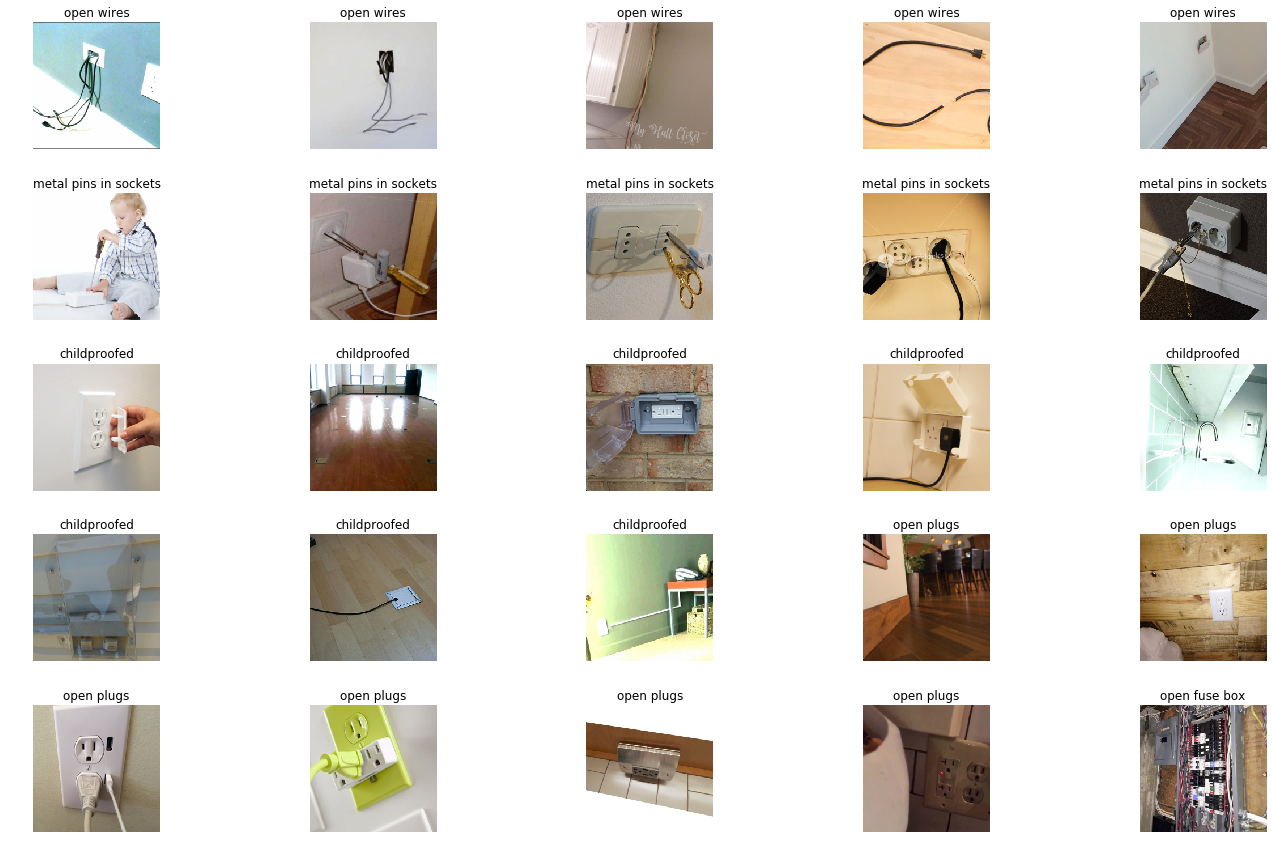

In [0]:
show_batch(data, rows=5, figsize=(20,12), imgsize=10)